In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
# Load the iris dataset
iris = load_iris()

# Convert the dataset to a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [2]:
# Add a new column for the target names
iris_df['species'] = iris.target_names[iris.target]

# Print the DataFrame
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       se

In [3]:
# Drop the species column for clustering
X = iris_df.drop(columns=['species'])

# Fit the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the DataFrame
iris_df['cluster'] = kmeans.labels_

# Print the DataFrame with cluster labels
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  cluster  
0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


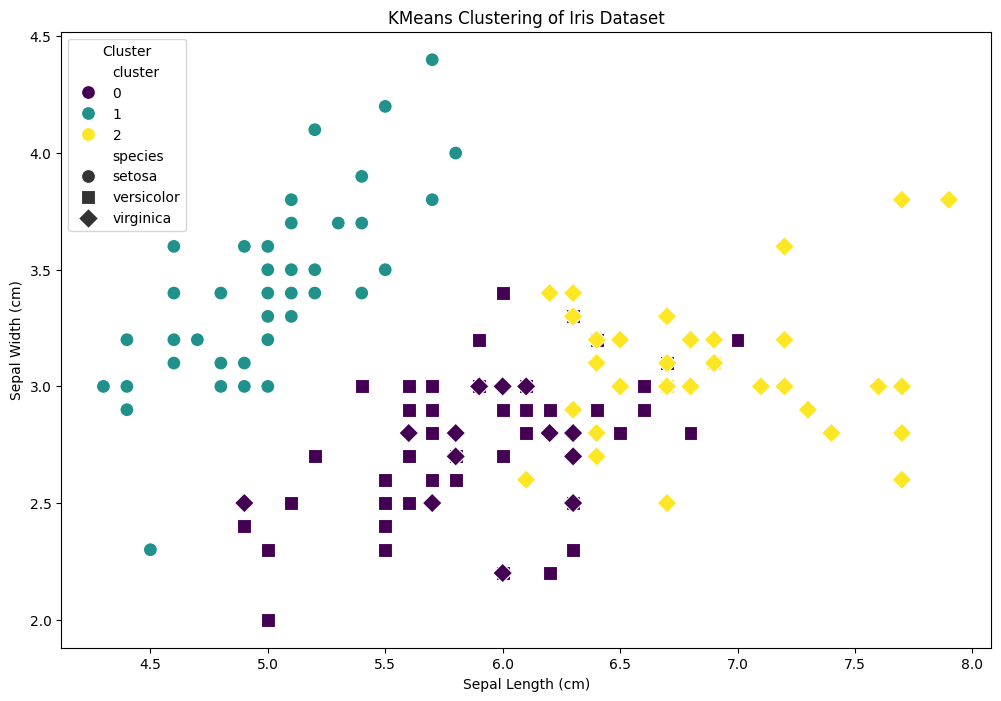

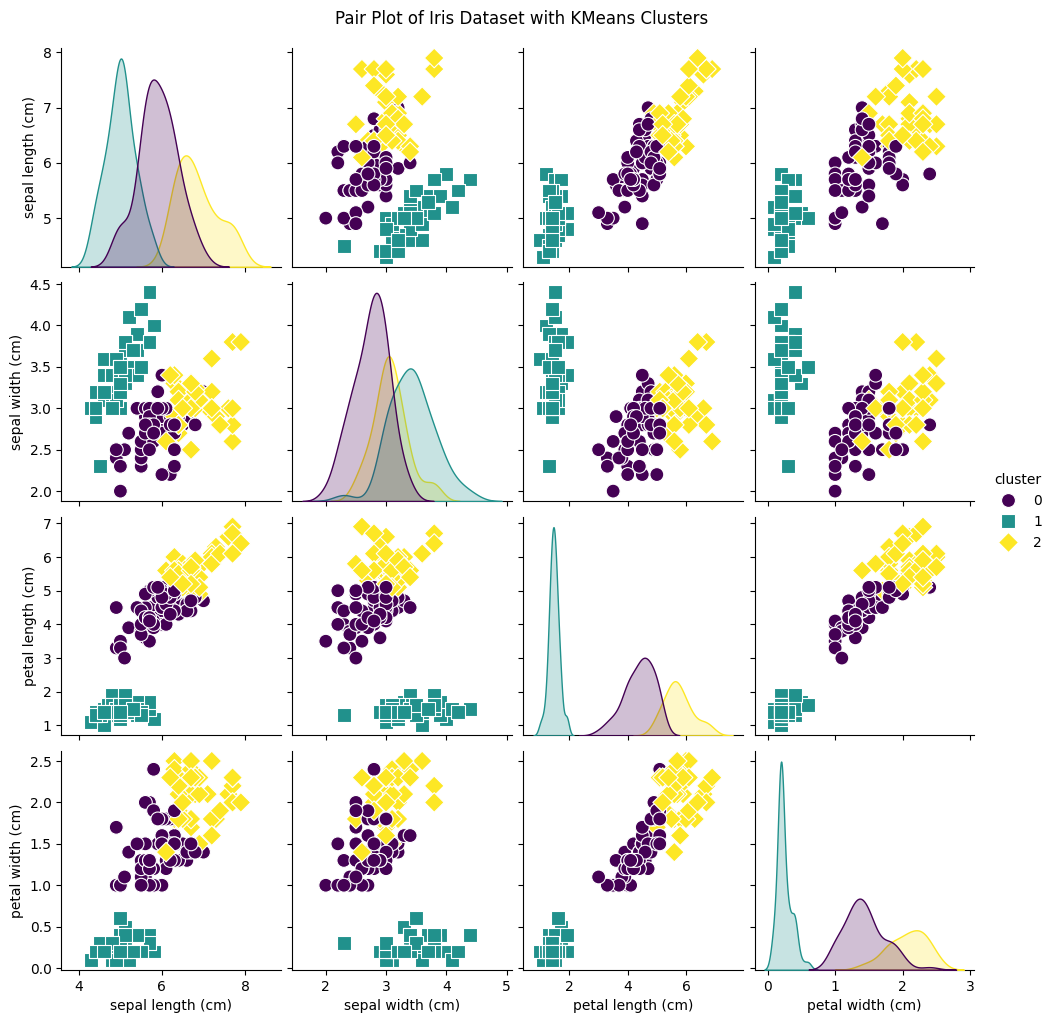

In [4]:
# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'],
                hue=iris_df['cluster'], palette='viridis', style=iris_df['species'],
                markers=['o', 's', 'D'], s=100)
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Cluster')
plt.show()

# Display a pair plot to visualize the clusters across all features
sns.pairplot(iris_df, hue='cluster', markers=['o', 's', 'D'], palette='viridis',
             plot_kws={'s': 100})
plt.suptitle('Pair Plot of Iris Dataset with KMeans Clusters', y=1.02)
plt.show()

In [5]:
conf_matrix = confusion_matrix(iris.target, iris_df['cluster'])
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]


In [6]:
# Classification report
class_report = classification_report(iris.target, iris_df['cluster'], target_names=iris.target_names)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        50
  versicolor       0.00      0.00      0.00        50
   virginica       0.95      0.72      0.82        50

    accuracy                           0.24       150
   macro avg       0.32      0.24      0.27       150
weighted avg       0.32      0.24      0.27       150



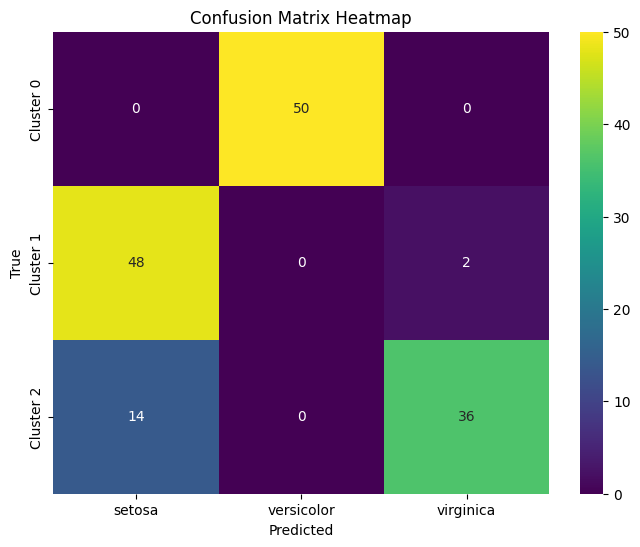

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

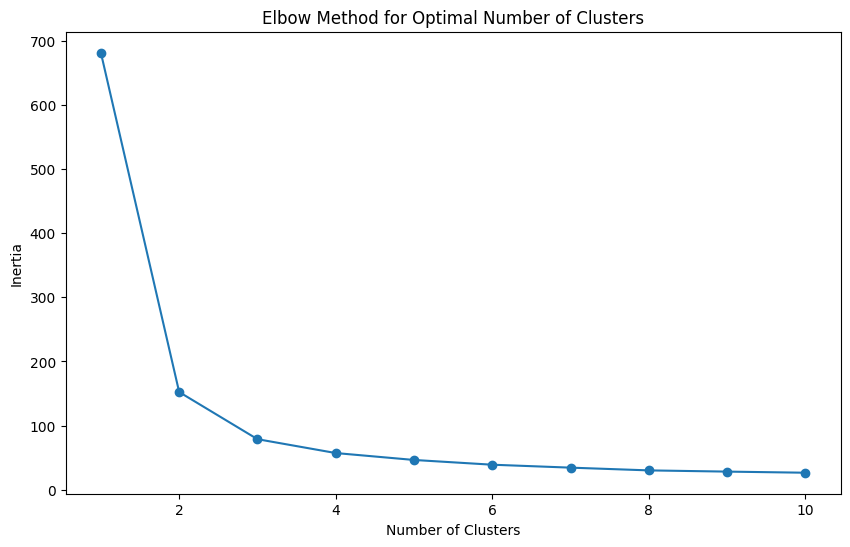

In [7]:
# Heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=iris.target_names, yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Elbow method to find the optimal number of clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()